# IMDB Data Analysis

170926 - Scott Brown

This is to learn how to play with data in python.

Data obtained from kaggle.com: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset/data

Based heavily on (copied from and added to) https://www.kaggle.com/arthurtok/principal-component-analysis-with-kmeans-visuals

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 

In [3]:
movie = pd.read_csv('../data/movie_metadata.csv') # reads the csv and creates the dataframe called movie
movie.head() # first 5 rows

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [14]:
movie.columns # list column names

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [12]:
## Top 10 highest rated movies
movie[["movie_title","imdb_score"]].sort_values("imdb_score", ascending=False)[:10]

,movie_title,imdb_score
2765,Towering Inferno,9.5
1937,The Shawshank Redemption,9.3
3466,The Godfather,9.2
4409,Kickboxer: Vengeance,9.1
2824,Dekalog,9.1
3207,Dekalog,9.1
66,The Dark Knight,9.0
2837,The Godfather: Part II,9.0
3481,Fargo,9.0
339,The Lord of the Rings: The Return of the King,8.9


In [15]:
## Get the numerical columns

str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = movie.columns.difference(str_list)  

In [19]:
movie_num = movie[num_list]
movie_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,7.1,0,NaN,NaN,8,NaN


In [20]:
## Replace NaN or NULL with 0
movie_num = movie_num.fillna(value=0, axis=1)

In [21]:
## Summary stats of each column
movie_num.describe()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
count,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000
mean,6550.941305,1647.496530,642.068015,2.075546,3.587432e+07,9699.063851,672.351576,106.882213,1.367638,3.997226e+07,6.442138,7525.964505,138.804283,271.634940,8.366816e+04,1959.585961
std,15012.315824,4038.092967,1661.808199,1.447089,1.961555e+08,18163.799124,2785.871819,25.828463,2.012180,6.483779e+07,1.125116,19320.445110,121.792053,377.603767,1.384853e+05,290.180846
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.600000,0.000000,0.000000,0.000000,5.000000e+00,0.000000
25%,611.000000,278.500000,130.000000,1.850000,3.000000e+06,1411.000000,6.000000,93.000000,0.000000,3.037815e+05,5.800000,0.000000,48.000000,64.000000,8.593500e+03,1998.000000
50%,986.000000,595.000000,367.000000,1.850000,1.500000e+07,3090.000000,45.000000,103.000000,1.000000,1.527968e+07,6.600000,166.000000,109.000000,155.000000,3.435900e+04,2005.000000
75%,11000.000000,918.000000,635.000000,2.350000,4.000000e+07,13756.500000,189.000000,118.000000,2.000000,5.135707e+07,7.200000,3000.000000,194.000000,324.000000,9.630900e+04,2011.000000
max,640000.000000,137000.000000,23000.000000,16.000000,1.221550e+10,656730.000000,23000.000000,511.000000,43.000000,7.605058e+08,9.500000,349000.000000,813.000000,5060.000000,1.689764e+06,2016.000000


In [22]:
## Normalization of the data
X = movie_num.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

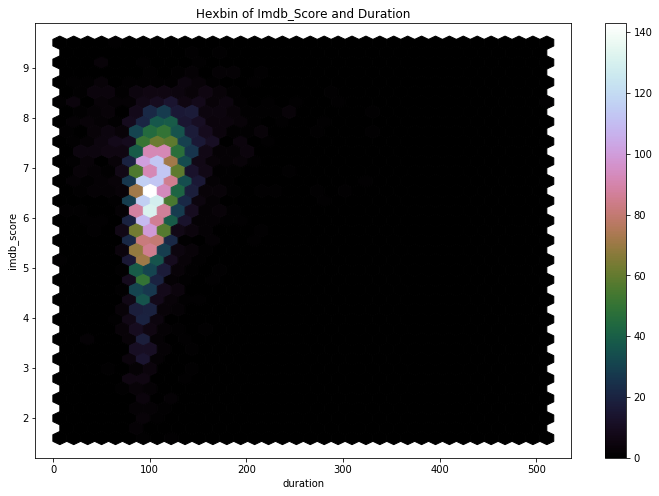

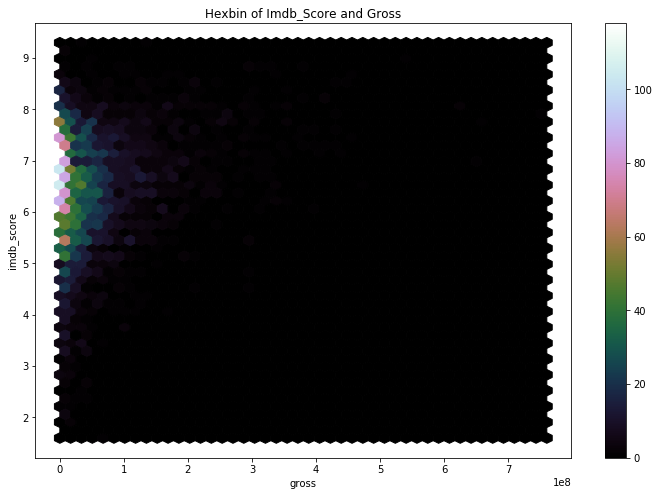

In [23]:
movie.plot(y= 'imdb_score', x ='duration',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration',figsize=(12,8))
movie.plot(y= 'imdb_score', x ='gross',kind='hexbin',gridsize=45, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Gross',figsize=(12,8))

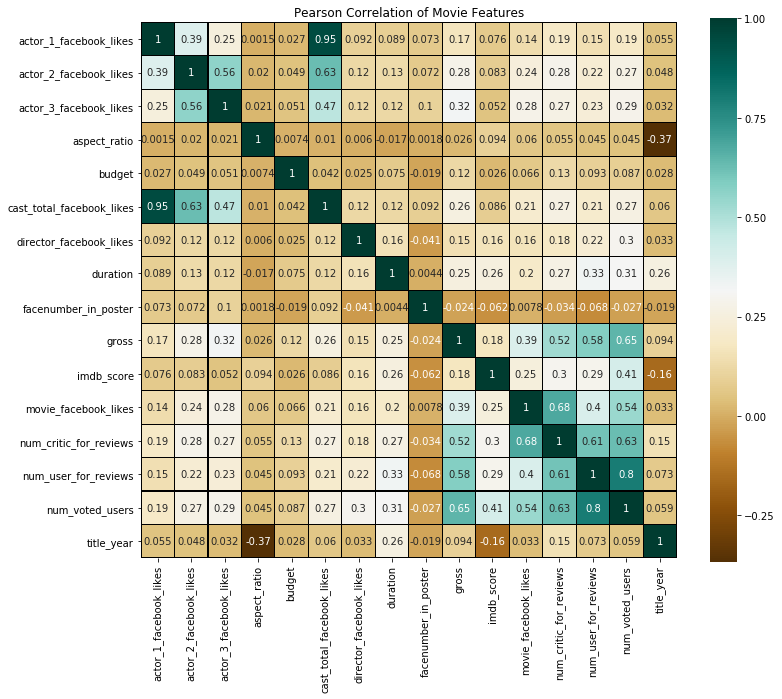

In [27]:
## Correlation Heatmap
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(movie_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="BrBG", linecolor='black', annot=True)

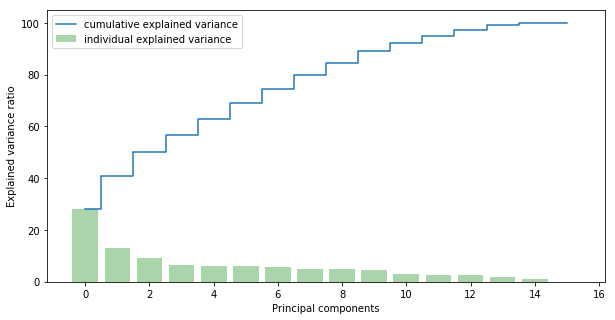

In [28]:
## PCA

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

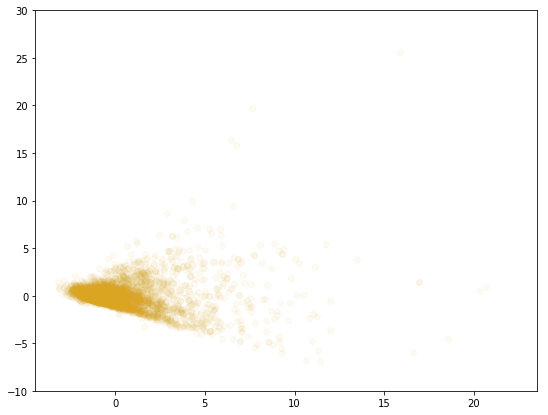

In [30]:
## Just use 9 components for the PCA
pca = PCA(n_components=9)
x_9d = pca.fit_transform(X_std)


plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.05)
plt.ylim(-10,30)
plt.show()

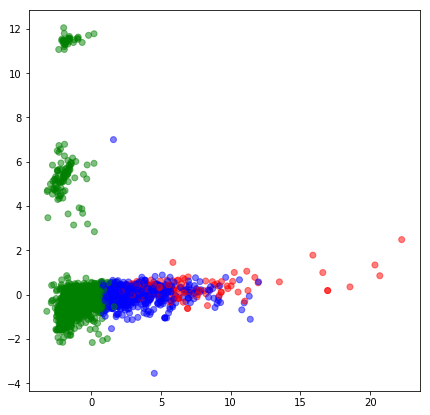

In [31]:
## K means clustering

kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [34]:
## Pairwise plots of the 9 components

# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_9d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

LinAlgError: singular matrix

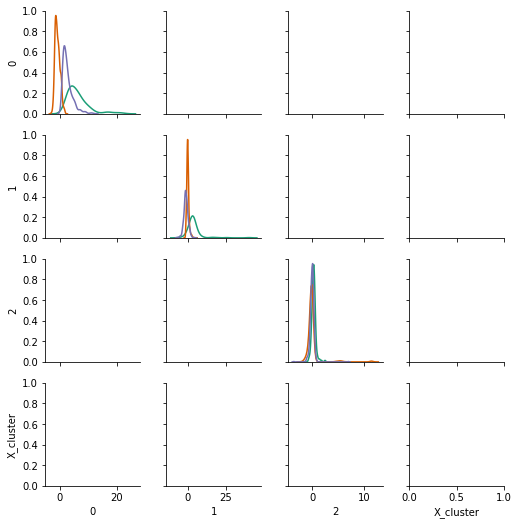

In [35]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)